In [1]:
%pip install langdetect
%pip install pandas
%pip install spacy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
from langdetect import detect
import pandas as pd
import spacy

In [3]:
# Carregar o modelo de idioma inglês
nlp = spacy.load("en_core_web_sm")

# Função para detectar o idioma usando o Spacy
def detect_language(text):
    doc = nlp(text)
    return doc.lang_

def contar_frases(text):
  if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
      doc = nlp(text)
      return len(list(doc.sents))
  else:
      return 0  # Retorna 0 se o texto for inválido ou vazio
        
# Função para contar o número de palavras em uma descrição usando spaCy
def contar_palavras(text):
    if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
        doc = nlp(text)
        return len(list(doc))
    else:
        return 0  # Retorna 0 se o texto for inválido ou vazio

In [4]:
# Lendo Dados
dados_gerais = pd.read_csv('C:\\Users\\rodri\\Downloads\\JiraRepos.JiraEcosystem.csv')

# Aplicar a função de detecção de idioma à coluna 'fields.description' e armazenar o resultado em uma nova coluna
dados_gerais['lang'] = dados_gerais['fields.description'].apply(lambda x: detect_language(str(x)))

# Filtrar apenas os registros onde o idioma detectado é inglês
dados= dados_gerais[dados_gerais['lang'] == 'en']

# Selecionar apenas as colunas 'fields.description', 'fields.timeestimate' e 'id'
dados_filtrados = dados[['fields.description', 'fields.timeestimate', 'id']]

dados_filtrados.head()

,fields.description,fields.timeestimate,id
0,Encountered this plugin within the ecosystem.a...,14400,134767
1,Reference to ${req.contextPath} in the files v...,1800,70685
2,This test started failing when UPM-1020 was im...,14400,41030
3,I verified in PAC that Atlassian Connector for...,7200,40983
4,"This means that if you start on a tab, switch ...",7200,40932


In [ ]:
# Total de Registros
total_registros = len(dados_filtrados)

In [ ]:
# Contando o número de frases em cada descrição
dados_filtrados['num_frases'] = dados_filtrados['fields.description'].apply(lambda x: contar_frases(str(x)))

In [ ]:
# Total de Frases
total_frases = dados_filtrados['num_frases'].sum()

In [ ]:
# Média e Desvio Padrão de Frases
media_frases = dados_filtrados['num_frases'].mean()
desvio_padrao_frases = dados_filtrados['num_frases'].std()

In [ ]:
# Contando o número de palavras em cada descrição
dados_filtrados['num_palavras'] = dados_filtrados['fields.description'].apply(lambda x: contar_palavras(str(x)))

In [ ]:
# Total de Palavras
total_palavras = dados_filtrados['num_palavras'].sum()

In [ ]:
# Média e Desvio Padrão de Palavras
media_palavras = dados_filtrados['num_palavras'].mean()
desvio_padrao_palavras = dados_filtrados['num_palavras'].std()

In [ ]:
# Exibindo os resultados
print(f"Total de Registros: {total_registros}")
print(f"Total de Frases: {total_frases}")
print(f"Média de Frases por Registro: {media_frases:.2f}")
print(f"Desvio Padrão de Frases por Registro: {desvio_padrao_frases:.2f}")
print(f"Total de Palavras: {total_palavras}")
print(f"Média de Palavras por Registro: {media_palavras:.2f}")
print(f"Desvio Padrão de Palavras por Registro: {desvio_padrao_palavras:.2f}")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from unicodedata import normalize

In [6]:
def preprocessar_descricao(list_descricao):
  descricao_2 = []
  with tqdm(total=len(list_descricao),
            desc='Processando Descrições') as pbar:
    for descricao in list_descricao:
      doc = nlp(str(descricao))
      tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT'
                and len(t.lemma_) > 1 and not t.is_stop]
      descricao_processada = ' '.join(tokens).strip()
      descricao_2.append(descricao_processada)
      pbar.update(1)
  return descricao_2

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                               max_features=None)
X = vectorizer.fit_transform(dados_filtrados['fields.description'])

In [8]:
# Converta a matriz TF-IDF para um DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Adicione a coluna de tempo estimado
X_df['timeestimate'] = dados_filtrados['fields.timeestimate'].values

# Calcular a correlação entre as características TF-IDF e o tempo estimado
correlation_matrix = X_df.corr()

# Mostrar correlação apenas com a variável 'timeestimate'
timeestimate_corr = correlation_matrix['timeestimate'].sort_values(ascending=False)
print(timeestimate_corr)


timeestimate       1.000000
nimplementation    0.395974
approved           0.393758
verbiage           0.393758
subscribe          0.393758
                     ...   
cru               -0.069007
cr                -0.070829
ag                -0.079527
atlassian         -0.082688
com               -0.101927
Name: timeestimate, Length: 7737, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

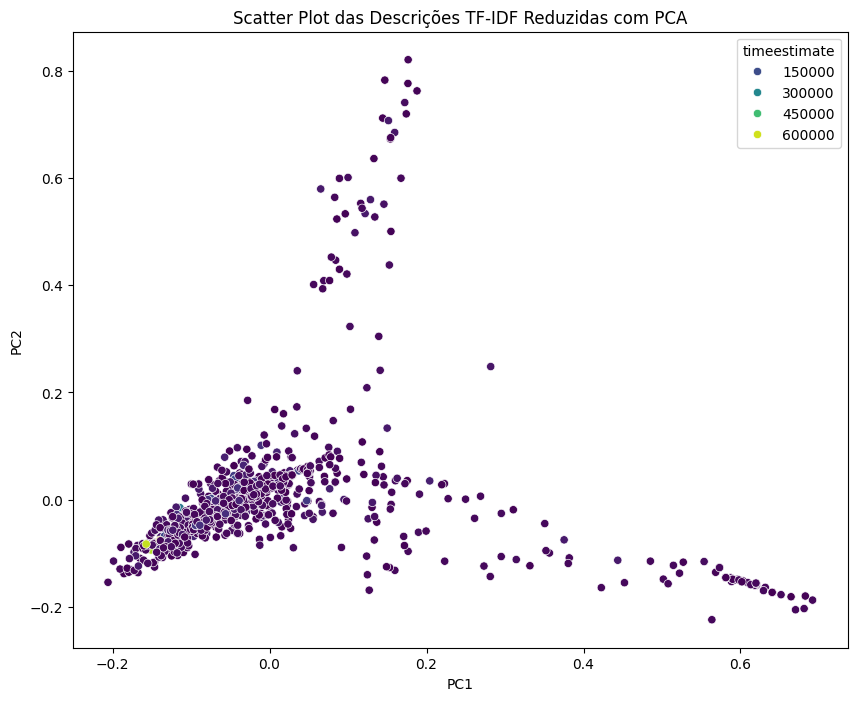

In [11]:
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Converter para DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['timeestimate'] = dados_filtrados['fields.timeestimate'].values

# Plotar os componentes principais
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='timeestimate', data=X_pca_df, palette='viridis')
plt.title('Scatter Plot das Descrições TF-IDF Reduzidas com PCA')
plt.show()


In [12]:
texts_normalizados = preprocessar_descricao(dados_filtrados['fields.description'].values)
X = vectorizer.fit_transform(texts_normalizados).toarray()

y = dados_filtrados['fields.timeestimate'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f'\nTreinamento: {len(X_train)} -- {len(y_train)}')
print(f'Teste: {len(X_test)} -- {len(y_test)}')

Processando Descrições: 100%|██████████| 1066/1066 [00:18<00:00, 58.15it/s]


Treinamento: 852 -- 852
Teste: 214 -- 214


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
#classificador = LogisticRegression()
#svc = SVC()
linearRegression = LogisticRegression()

#classificador.fit(X_train, y_train)
#svc.fit(X_train, y_train)
linearRegression.fit(X_train, y_train)

LogisticRegression()

In [15]:
#y_pred_1 = classificador.predict(X_test)
#y_pred_2 = svc.predict(X_test)
y_pred_3 = linearRegression.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

report = classification_report(y_test, y_pred_3)
print(report)

              precision    recall  f1-score   support

          60       0.00      0.00      0.00         1
         600       0.00      0.00      0.00         2
         900       0.00      0.00      0.00         1
        1800       0.00      0.00      0.00         3
        3600       0.29      0.06      0.10        33
        7200       0.17      0.07      0.10        29
       10800       0.00      0.00      0.00         5
       14400       0.29      0.89      0.44        57
       18000       0.00      0.00      0.00         2
       21600       0.11      0.07      0.09        27
       28800       0.00      0.00      0.00        10
       43200       0.00      0.00      0.00        16
       54000       0.00      0.00      0.00         1
       57600       0.00      0.00      0.00         6
       64800       0.00      0.00      0.00         7
       86400       0.00      0.00      0.00         5
      108000       0.00      0.00      0.00         1
      115200       0.00    

d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


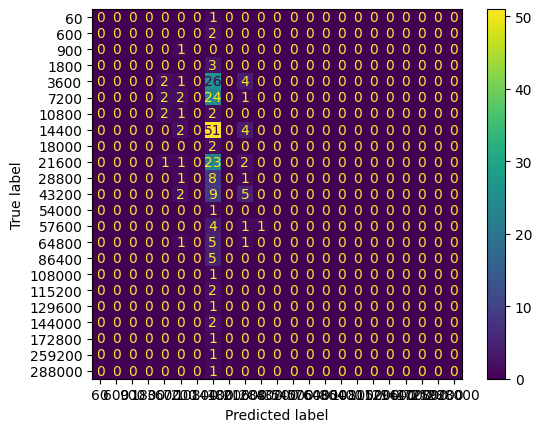

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)

In [18]:
report = classification_report(y_test, y_pred_3)

print(report)

              precision    recall  f1-score   support

          60       0.00      0.00      0.00         1
         600       0.00      0.00      0.00         2
         900       0.00      0.00      0.00         1
        1800       0.00      0.00      0.00         3
        3600       0.29      0.06      0.10        33
        7200       0.17      0.07      0.10        29
       10800       0.00      0.00      0.00         5
       14400       0.29      0.89      0.44        57
       18000       0.00      0.00      0.00         2
       21600       0.11      0.07      0.09        27
       28800       0.00      0.00      0.00        10
       43200       0.00      0.00      0.00        16
       54000       0.00      0.00      0.00         1
       57600       0.00      0.00      0.00         6
       64800       0.00      0.00      0.00         7
       86400       0.00      0.00      0.00         5
      108000       0.00      0.00      0.00         1
      115200       0.00    

d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Mestrado\Python\Projeto\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


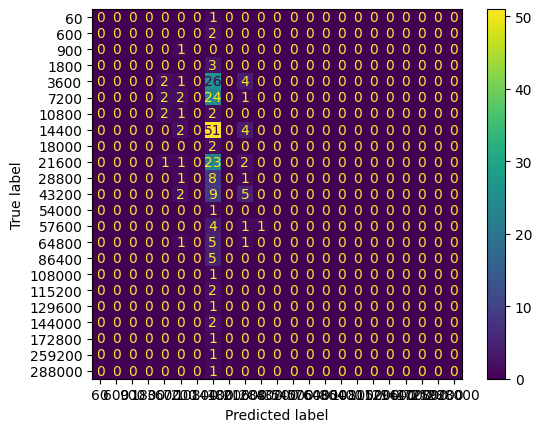

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)